<a href="https://colab.research.google.com/github/78furu/deeplea_adv/blob/master/deeplea_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/github_repos/deeplea_adv/'
%pwd
! git pull

import unet

Mounted at /content/drive
/content/drive/MyDrive/github_repos/deeplea_adv
Already up to date.


In [2]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
from preproc import training_and_eval, load_and_preprocess_data
from models import Score
import yaml
from collections import namedtuple

print(f"Pytorch version: {torch.__version__}")

# Set the runtime environment to GPU in: Edit -> Notebook settings or Runtime -> Change runtime type  
if torch.cuda.is_available() is False:
    raise Exception("GPU device not found, runtime environment should be set to GPU")
print(f"Using GPU device: {torch.cuda.get_device_name(torch.cuda.current_device())}")

# Seed random number generator
torch.manual_seed(0)
np.random.seed(0)

Pytorch version: 1.8.1+cu101
Using GPU device: Tesla T4


In [3]:
config = yaml.load(open(r'scorenet.yml'))
config2 = {}
for k,d in config.items():
    MyTuple = namedtuple("MyTuple", d)
    if d.get("image_size"):
        d["image_size"] = 28
        d["channels"] = 1
    my_tuple = MyTuple(**d)
    config2[k] = my_tuple

MyTuple = namedtuple("MyTuple", config2)
my_tuple = MyTuple(**config2)

In [ ]:
net = Score(my_tuple)
MODEL = net.to(torch.cuda.current_device())
MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)

Dataset: mnist 
 Image shape: (1, 28, 28) 
 Number of train images: 60000 
 Number of test images: 10000 
 Number of classes: 10 



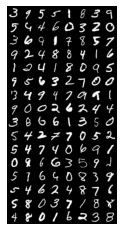

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

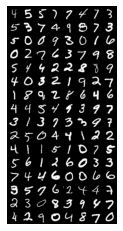

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

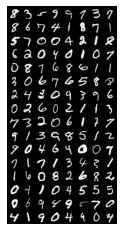

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

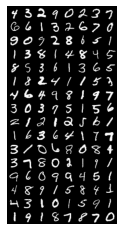

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

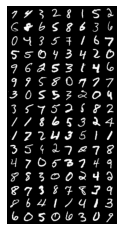

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

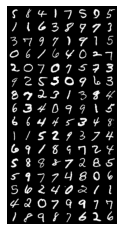

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

In [ ]:

DATASET_NAME = 'mnist'

# TODO
OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-3)  
BATCH_SIZE = 128  
NUM_EPOCHS = 100 
sigmas_ = [5,1,0.5, 0.1, 0.05, 0.01]

for sig in sigmas_:
    trained_model, loss_and_accuracy_history = training_and_eval(DATASET_NAME, 
                                                                MODEL,
                                                                OPTIMIZER,
                                                                BATCH_SIZE, 
                                                                NUM_EPOCHS,
                                                                augment = False, 
                                                                need_summary = True,
                                                                sigma=sig)
    print(f'\n\n\n#######################\nsig {sig} done\n\n')

In [ ]:
torch.save(MODEL.state_dict(), "model_params_2_all_trained_for210_epochs.pt")

Dataset: mnist 
 Image shape: (1, 28, 28) 
 Number of train images: 60000 
 Number of test images: 10000 
 Number of classes: 10 



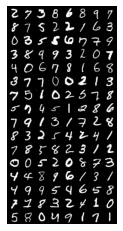

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

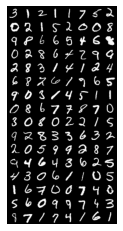

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

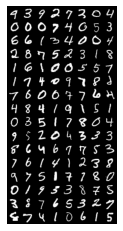

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

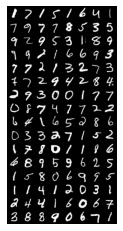

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

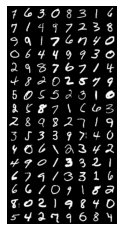

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

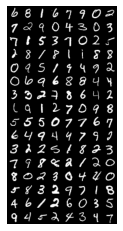

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

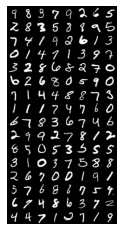

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             544
         GroupNorm-2           [-1, 32, 14, 14]              64
               ELU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          32,832
         GroupNorm-5             [-1, 64, 7, 7]             128
               ELU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 3, 3]         204,928
         GroupNorm-8            [-1, 128, 3, 3]             256
               ELU-9            [-1, 128, 3, 3]               0
  ConvTranspose2d-10             [-1, 64, 7, 7]         204,864
        GroupNorm-11             [-1, 64, 7, 7]             128
              ELU-12             [-1, 64, 7, 7]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
        GroupNorm-14     

In [ ]:

DATASET_NAME = 'mnist'

# TODO
OPTIMIZER =  torch.optim.Adam(MODEL.parameters(), lr=1e-3)  
BATCH_SIZE = 128  
NUM_EPOCHS = 100 


for sig in [10, 5, 1,0.5, 0.1, 0.05, 0.01]:
    trained_model, loss_and_accuracy_history = training_and_eval(DATASET_NAME, 
                                                                MODEL,
                                                                OPTIMIZER,
                                                                BATCH_SIZE, 
                                                                NUM_EPOCHS,
                                                                augment = False, 
                                                                need_summary = True,
                                                                sigma=sig)
    print(f'\n\n\n#######################\nsig {sig} done\n\n')

In [ ]:
torch.save(MODEL.state_dict(), "model_params_2_all_trained_for310_epochs_sig10_added.pt")

In [ ]:
train, test = load_and_preprocess_data("mnist", BATCH_SIZE)

NameError: ignored

In [ ]:
outp = MODEL((train.dataset.data[:32].view(32, 1, 28, 28)/255).to("cuda"))

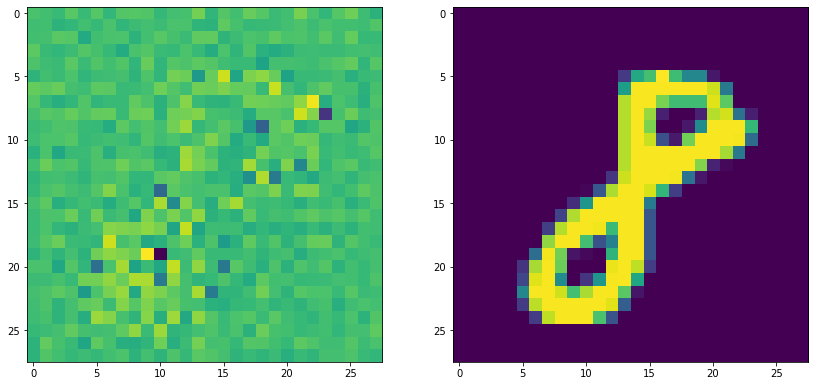

In [ ]:
c = 31
image = outp[c].detach().cpu().numpy().astype(float)

fig, axes = plt.subplots(1,2, figsize=(14, 8))

ax = axes[0]
#ax.imshow(np.moveaxis(image, [0,1,2], [2,0,1]))
ax.imshow(image[0])
ax = axes[1]
ax.imshow(train.dataset.data[c])

In [4]:
length = 10
ratio = pow(0.01/10, 1/9)
start = 10
progression = np.array([start * ratio**i for i in range(length)])
num_of_images = 10
epses = np.logspace(-5, -1, 9)

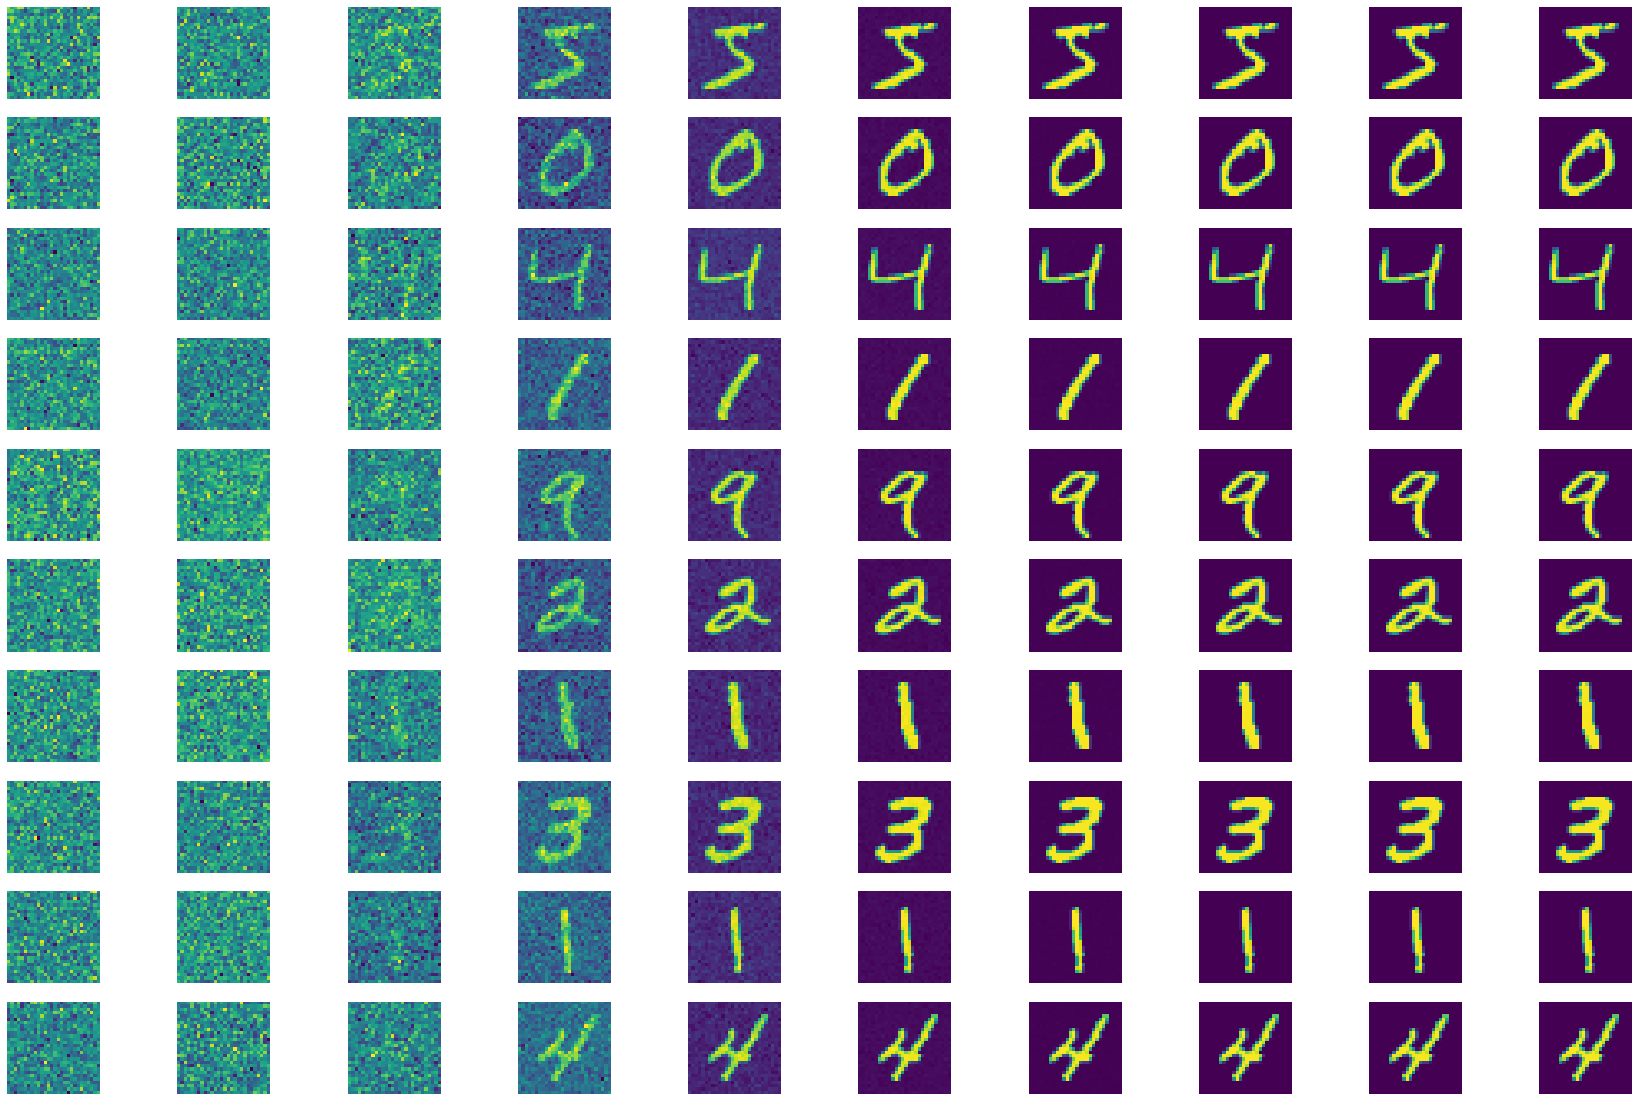

In [ ]:


fig, axes = plt.subplots(num_of_images,progression.shape[0], figsize=(30, 20))
for im,c in zip(train.dataset.data, range(num_of_images)):
    for eps, ax in zip(progression, axes[c, :]):
        eps = (eps**2/progression[-1]**2)*2e-5
        im_ = im/255 + np.random.normal(scale=eps,size=im.shape)
        #im_ = (im_-np.min(im_))/(np.max(im_)-np.min(im_))
        ax.imshow(im_);
        ax.axis('off')

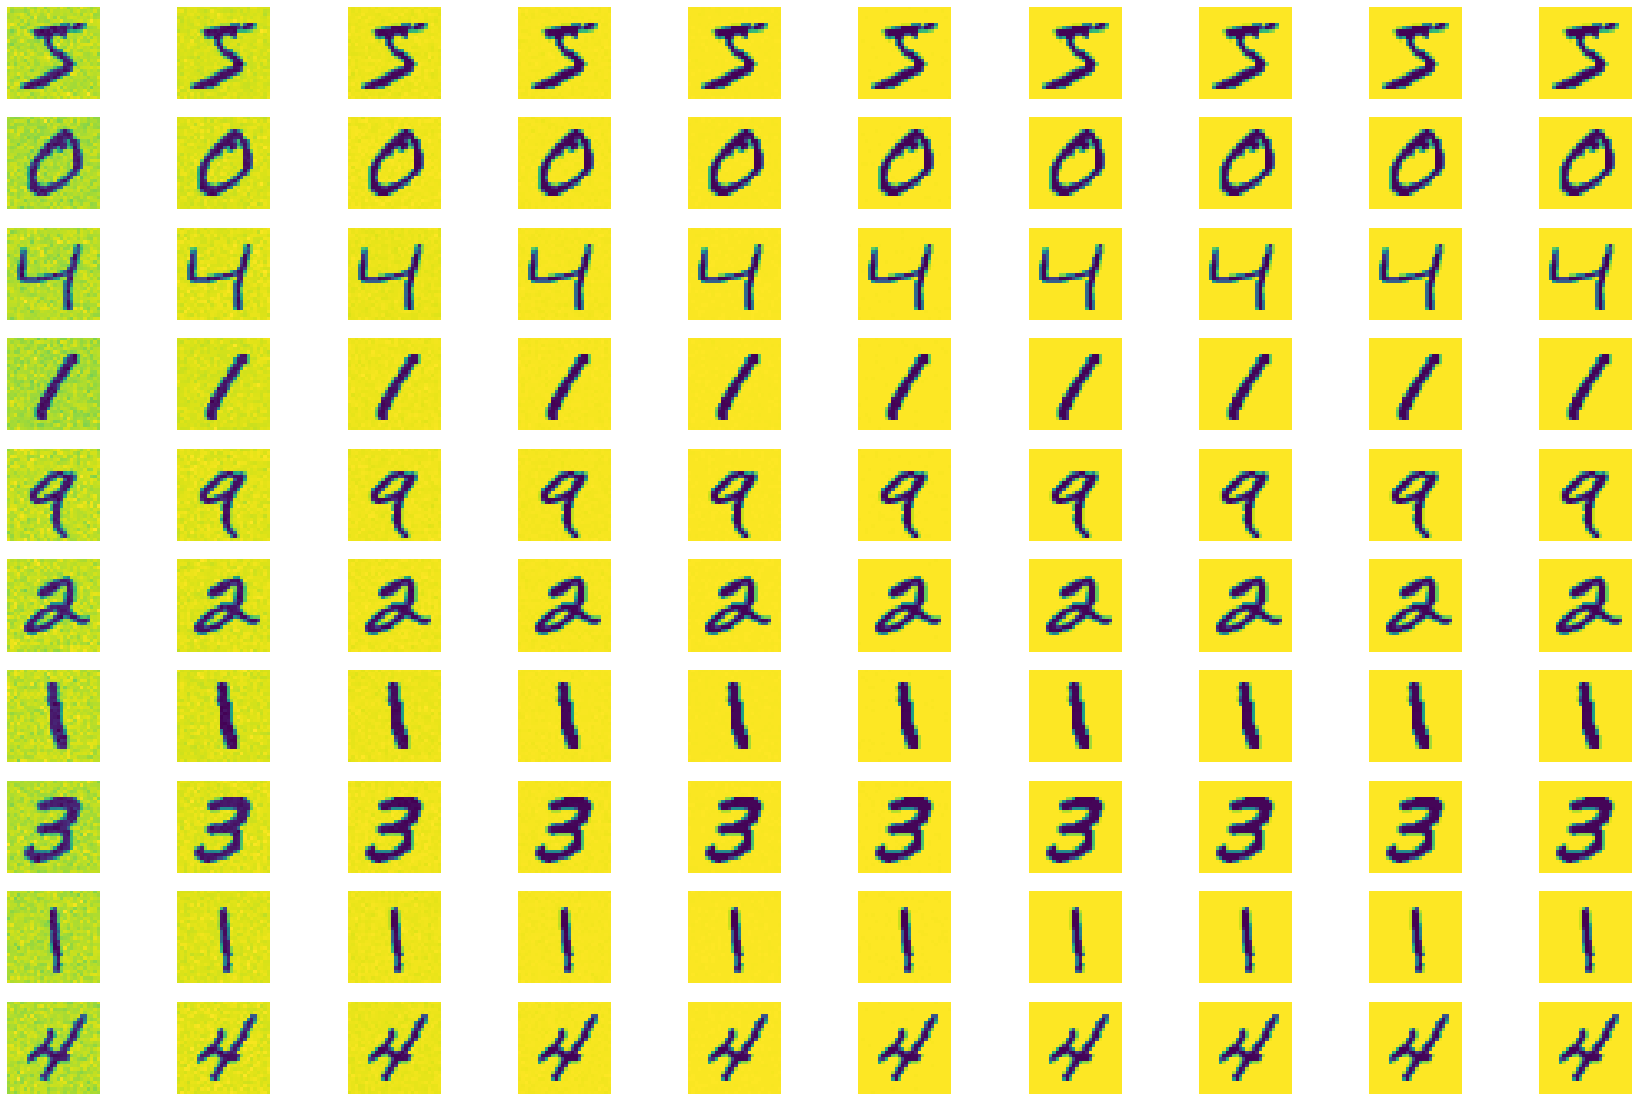

In [ ]:
fig, axes = plt.subplots(num_of_images,progression.shape[0], figsize=(30, 20))
for im,c in zip(train.dataset.data, range(num_of_images)):
    for eps, ax in zip(progression, axes[c, :]):
        eps_ = (eps**2/progression[-1]**2)*2e-5
        im_ = im/255 + np.random.normal(scale=eps,size=im.shape)
        #im_ = (im_-np.min(im_))/(np.max(im_)-np.min(im_))
        ax.imshow((im_-im)/eps);
        ax.axis('off')

In [ ]:
device = torch.cuda.current_device()
for sigma in epses:

    for i, (images, labels) in enumerate(train):
        images_o = images.to(device)
        #eps_ = (eps**2/progression[-1]**2)*2e-5
        images = images_o + torch.normal(0, std=sigma, size=images.shape).to(device)
        labels = (images-images_o)/sigma

KeyboardInterrupt: ignored

In [ ]:
torch.normal( std = sigma, size=images.shape)

TypeError: ignored

In [7]:
def annealed_langevin(model, sigmas, eps, T):
    x_0 = torch.rand(1,1, 28, 28).to("cuda")
    for sigma in sigmas:
        alpha = eps*sigma**2/sigmas[-1]**2
        for t in range(T):
            z = torch.normal(0, 1, size = x_0.shape).to("cuda")
            x_0 += alpha/2 * model(x_0) +  np.sqrt(alpha)*z
    return x_0

In [19]:
epsilons = np.logspace(-5, -10, 12)
t_s = [1, 10, 50, 100, 200, 500, 1000, 2000,]
gen_images = [annealed_langevin(MODEL,progression,e, 100)[0][0].cpu().detach().numpy() for e in epsilons]
#gen_images = [annealed_langevin(MODEL,progression,epsilons[-1], t)[0][0].cpu().detach().numpy() for t in t_s]

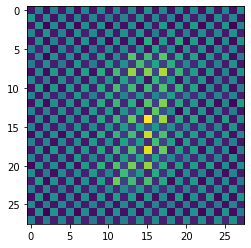

In [ ]:
c = annealed_langevin(loaded_model,progression,2e-5, 100)
plt.imshow(c[0][0].cpu().detach().numpy())

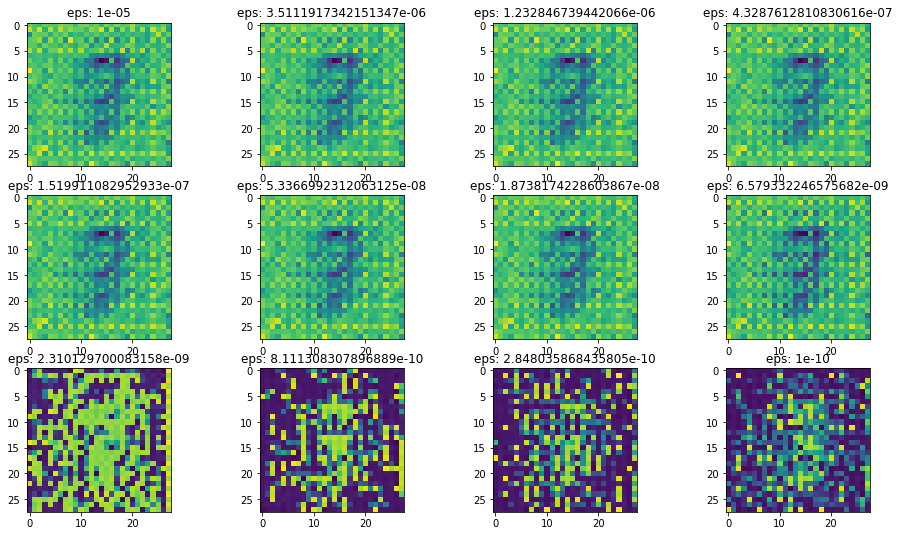

In [20]:
fig, axes = plt.subplots(3,4, figsize = (16,9))

for im, ax, ep in zip(gen_images, axes.ravel(), epsilons):
    ax.imshow(im)
    ax.set_title(f"eps: {ep}")

fig.savefig('figs/different_epses_appr_310_epochs_for_allsigmas_plus_10sigma.png', dpi = 100)

In [ ]:
!git push

Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 1.59 KiB | 816.00 KiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/78furu/deeplea_adv.git
   7933b53..f89d4e8  master -> master


In [ ]:
MODEL

NameError: ignored

In [ ]:
progression

array([10.        ,  4.64158883,  2.15443469,  1.        ,  0.46415888,
        0.21544347,  0.1       ,  0.04641589,  0.02154435,  0.01      ])

In [ ]:
    torch.cuda.empty_cache()

In [ ]:
del gen_images

In [ ]:
!pwd

/content/drive/My Drive/github_repos/deeplea_adv


In [ ]:
torch.save(MODEL.state_dict(), "model_params_2_all_trained_for160_epochs.pt")

In [5]:
MODEL = Score(my_tuple)
MODEL = MODEL.to(torch.cuda.current_device())
MODEL.input_size=(my_tuple.data.channels,my_tuple.data.image_size,my_tuple.data.image_size)
MODEL.load_state_dict(torch.load("model_params_2_all_trained_for310_epochs_sig10_added.pt"))

<All keys matched successfully>

Or save total model:

In [ ]:
torch.save(MODEL, 'model.pt')

PicklingError: ignored

In [ ]:
loaded_model = torch.load("model.pt")

In [22]:
!git status
!git add *
!git config --global user.email "78furu@gmail.com"
!git config --global user.name "Kristof Furuglyas"
!git commit -m "more sigmas run, fig added"
!git push


On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	figs/different_epses_appr_310_epochs_for_allsigmas_plus_10sigma.png

nothing added to commit but untracked files present (use "git add" to track)
The following paths are ignored by one of your .gitignore files:
data
Use -f if you really want to add them.
[master bea0fb0] more sigmas run, fig added
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 figs/different_epses_appr_310_epochs_for_allsigmas_plus_10sigma.png
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 86.46 KiB | 12.35 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/78furu/deeplea_adv.git
   61eb437..bea0fb0  master -> master


In [ ]:
! git push

Counting objects: 13, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 29.73 MiB | 11.68 MiB/s, done.
Total 13 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/78furu/deeplea_adv.git
   9d7522a..b682012  master -> master
